In [1]:
import pip
pip.main(["install","yfinance"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached requests-2.31.0-py3-none-any.whl (62 kB)


  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136948 sha256=4440c0a3797c541672665d2377a703c324dbd00f96b63ee83bb8541c9bbfa11a
  Stored in directory: c:\users\praneeth\appdata\local\pip\cache\wheels\77\ca\43\00120282a2aa9323dd8da301fb17ea79f84c35fc6faa9f94ea
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting unins

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
rasa 3.1.0 requires joblib<1.1.0,>=0.15.1, but you have joblib 1.3.2 which is incompatible.
rasa 3.1.0 requires pytz<2022.0,>=2019.1, but you have pytz 2024.1 which is incompatible.
rasa 3.1.0 requires scikit-learn<0.25,>=0.22, but you have scikit-learn 1.3.2 which is incompatible.
rasa 3.1.0 requires typing-extensions<4.0.0,>=3.7.4, but you have typing-extensions 4.9.0 which is incompatible.
rasa-sdk 3.1.1 requires typing-extensions<4.0.0,>=3.7.4, but you have typing-extensions 4.9.0 which is incompatible.


0

In [2]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


NumExpr defaulting to 4 threads.


In [3]:
df = yf.download("AAPL", start="2015-01-01", end="2024-02-13")

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435265,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746891,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749125,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082138,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007431,237458000
2015-01-09,28.167500,28.312500,27.552500,28.002501,25.034250,214798000
2015-01-12,28.150000,28.157499,27.200001,27.312500,24.417391,198603200
2015-01-13,27.857500,28.200001,27.227501,27.555000,24.634184,268367600
2015-01-14,27.260000,27.622499,27.125000,27.450001,24.540314,195826400


In [6]:
df["Close"]

Date
2015-01-02     27.332500
2015-01-05     26.562500
2015-01-06     26.565001
2015-01-07     26.937500
2015-01-08     27.972500
                 ...    
2024-02-06    189.300003
2024-02-07    189.410004
2024-02-08    188.320007
2024-02-09    188.850006
2024-02-12    187.149994
Name: Close, Length: 2293, dtype: float64

In [11]:
df = df["Close"].to_frame()
df.head(10)

,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
2015-01-09,28.002501
2015-01-12,27.312500
2015-01-13,27.555000
2015-01-14,27.450001


In [13]:
df["close in 10 days"] = df["Close"].shift(-10)

In [14]:
df.tail(20)

,Close,close in 10 days
Date,,
2024-01-16,183.630005,188.039993
2024-01-17,182.679993,184.399994
2024-01-18,188.630005,186.860001
2024-01-19,191.559998,185.850006
2024-01-22,193.889999,187.679993
2024-01-23,195.179993,189.300003
2024-01-24,194.500000,189.410004
2024-01-25,194.169998,188.320007
2024-01-26,192.419998,188.850006


In [15]:
dfc = df.iloc[:-10,:]

In [16]:
df.reset_index(inplace=True)

In [17]:
df

,Date,Close,close in 10 days
0,2015-01-02,27.332500,26.497499
1,2015-01-05,26.562500,27.180000
2,2015-01-06,26.565001,27.387501
3,2015-01-07,26.937500,28.100000
4,2015-01-08,27.972500,28.245001
...,...,...,...
2288,2024-02-06,189.300003,NaN
2289,2024-02-07,189.410004,NaN
2290,2024-02-08,188.320007,NaN
2291,2024-02-09,188.850006,NaN


In [18]:
x = dfc.iloc[:,0].values.reshape(dfc.shape[0],1)
y = dfc.iloc[:,1].values

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [21]:
rf = RandomForestRegressor(n_estimators=800)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

6.0398674697585175

In [23]:
y_act_10 = dfc.iloc[-10:,:]["close in 10 days"].values
y_act_10

array([188.03999329, 184.3999939 , 186.86000061, 185.8500061 ,
       187.67999268, 189.30000305, 189.41000366, 188.32000732,
       188.8500061 , 187.1499939 ])

In [28]:
y_pred_10 = rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))

In [29]:
y_pred_10

array([188.22901991, 186.99849995, 188.58849958, 188.1095158 ,
       190.13459677, 188.94321394, 184.69973308, 190.68506509,
       190.22265327, 186.72447361])

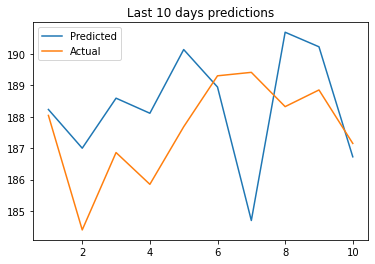

In [30]:
plt.plot(range(1,11),y_pred_10)
plt.plot(range(1,11),y_act_10)
plt.legend(["Predicted","Actual"])
plt.title("Last 10 days predictions")
plt.show()